In [1]:
import numpy as np
import pandas as pd
train_data = pd.read_hdf("train_dc2020.h5", 'data')
labels = pd.read_csv("train_labels.csv")


In [2]:
concat=pd.concat([train_data,labels],axis=1).drop(columns=["ID"]).dropna()

In [3]:
from sklearn.model_selection import train_test_split
y=concat["source_id"]
X=concat.drop(columns=["source_id"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=0)

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[   93   290  2479  1310  2164    38]
 [    6  4352  9613  1359 14354   163]
 [   27  1714 32294  2878 13751   225]
 [   43   814  8205  8294  6477   115]
 [    7  2163 13980  1432 43465   268]
 [    1   744  4259   692  7486   673]]
              precision    recall  f1-score   support

           0       0.53      0.01      0.03      6374
           1       0.43      0.15      0.22     29847
           2       0.46      0.63      0.53     50889
           3       0.52      0.35      0.42     23948
           4       0.50      0.71      0.58     61315
           5       0.45      0.05      0.09     13855

    accuracy                           0.48    186228
   macro avg       0.48      0.32      0.31    186228
weighted avg       0.48      0.48      0.43    186228

0.4788270292329832


In [4]:
testdata= pd.read_hdf("test_dc2020.h5", 'data')


In [37]:
y_pred = clf.predict(np.nan_to_num(testdata.drop(columns=["ID"])))

In [38]:


sub= pd.DataFrame({'ID': testdata.ID, 'source_id': y_pred})

sub.to_csv('SubmissionRandomForestClassifier.csv',index=False)

In [82]:
X.columns

Index([           (0, 'ask'),           (0, 'ask1'),       (0, 'ask_size'),
            (0, 'ask_size1'),            (0, 'bid'),           (0, 'bid1'),
             (0, 'bid_size'),      (0, 'bid_size1'),          (0, 'price'),
                  (0, 'qty'),      (0, 'source_id'),            (0, 'tod'),
       (0, 'ts_last_update'),            (1, 'ask'),           (1, 'ask1'),
             (1, 'ask_size'),      (1, 'ask_size1'),            (1, 'bid'),
                 (1, 'bid1'),       (1, 'bid_size'),      (1, 'bid_size1'),
       (1, 'ts_last_update'),            (2, 'ask'),           (2, 'ask1'),
             (2, 'ask_size'),      (2, 'ask_size1'),            (2, 'bid'),
                 (2, 'bid1'),       (2, 'bid_size'),      (2, 'bid_size1'),
       (2, 'ts_last_update'),            (3, 'ask'),           (3, 'ask1'),
             (3, 'ask_size'),      (3, 'ask_size1'),            (3, 'bid'),
                 (3, 'bid1'),       (3, 'bid_size'),      (3, 'bid_size1'),
       (3, '

In [5]:
pd.set_option('display.max_columns', None)
cat_features=[train_data.columns.get_loc((0, 'source_id')),train_data.columns.get_loc((1, 'source_id')),train_data.columns.get_loc((2, 'source_id')),train_data.columns.get_loc((3, 'source_id')),train_data.columns.get_loc((4, 'source_id')),train_data.columns.get_loc((5, 'source_id')),train_data.columns.get_loc((6, 'source_id')),train_data.columns.get_loc((7, 'source_id')),train_data.columns.get_loc((8, 'source_id')),train_data.columns.get_loc((9, 'source_id'))]


In [25]:
from catboost import Pool, CatBoostClassifier

# train_data = [["summer", 1924, 44],
#               ["summer", 1932, 37],
#               ["winter", 1980, 37],
#               ["summer", 2012, 204]]

# eval_data = [["winter", 1996, 197],
#              ["winter", 1968, 37],
#              ["summer", 2002, 77],
#              ["summer", 1948, 59]]



train_dataset = Pool(data=X,
                     label=y,
                     cat_features=cat_features)

# eval_dataset = Pool(data=eval_data,
#                     label=eval_label,
#                     cat_features=cat_features)

# # Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500,
                           learning_rate=0.5,
                           loss_function='MultiClass')
# # Fit model
model.fit(train_dataset)
# # Get predicted classes
# preds_class = model.predict(eval_dataset)
# # Get predicted probabilities for each class
# preds_proba = model.predict_proba(eval_dataset)
# # Get predicted RawFormulaVal
# preds_raw = model.predict(eval_dataset, 
#                           prediction_type='RawFormulaVal')

0:	learn: 1.5505749	total: 15.8s	remaining: 2h 11m 17s
1:	learn: 1.4819879	total: 32.4s	remaining: 2h 14m 19s
2:	learn: 1.4422423	total: 46.4s	remaining: 2h 8m 7s
3:	learn: 1.4223957	total: 1m 23s	remaining: 2h 53m 8s
4:	learn: 1.4038552	total: 1m 36s	remaining: 2h 39m 8s
5:	learn: 1.3947347	total: 1m 47s	remaining: 2h 27m 28s
6:	learn: 1.3868614	total: 1m 59s	remaining: 2h 19m 55s
7:	learn: 1.3783415	total: 2m 10s	remaining: 2h 13m 38s
8:	learn: 1.3746641	total: 2m 20s	remaining: 2h 8m 11s
9:	learn: 1.3696035	total: 2m 32s	remaining: 2h 4m 43s
10:	learn: 1.3665302	total: 2m 43s	remaining: 2h 57s
11:	learn: 1.3614582	total: 2m 54s	remaining: 1h 58m 2s
12:	learn: 1.3559179	total: 3m 5s	remaining: 1h 55m 32s
13:	learn: 1.3491113	total: 3m 16s	remaining: 1h 53m 35s
14:	learn: 1.3439189	total: 3m 27s	remaining: 1h 51m 37s
15:	learn: 1.3420819	total: 3m 38s	remaining: 1h 49m 58s
16:	learn: 1.3407213	total: 3m 49s	remaining: 1h 48m 35s
17:	learn: 1.3380275	total: 4m 1s	remaining: 1h 47m 54s


143:	learn: 1.2712923	total: 27m 5s	remaining: 1h 6m 58s
144:	learn: 1.2711452	total: 27m 16s	remaining: 1h 6m 47s
145:	learn: 1.2709269	total: 27m 28s	remaining: 1h 6m 38s
146:	learn: 1.2706225	total: 27m 40s	remaining: 1h 6m 27s
147:	learn: 1.2704667	total: 27m 51s	remaining: 1h 6m 16s
148:	learn: 1.2702623	total: 28m 2s	remaining: 1h 6m 3s
149:	learn: 1.2702080	total: 28m 13s	remaining: 1h 5m 52s
150:	learn: 1.2700708	total: 28m 26s	remaining: 1h 5m 45s
151:	learn: 1.2698889	total: 28m 38s	remaining: 1h 5m 34s
152:	learn: 1.2696931	total: 28m 49s	remaining: 1h 5m 23s
153:	learn: 1.2694940	total: 29m	remaining: 1h 5m 9s
154:	learn: 1.2694484	total: 29m 10s	remaining: 1h 4m 56s
155:	learn: 1.2693883	total: 29m 21s	remaining: 1h 4m 43s
156:	learn: 1.2692140	total: 29m 31s	remaining: 1h 4m 30s
157:	learn: 1.2690559	total: 29m 42s	remaining: 1h 4m 17s
158:	learn: 1.2689467	total: 29m 52s	remaining: 1h 4m 4s
159:	learn: 1.2688757	total: 30m 2s	remaining: 1h 3m 51s
160:	learn: 1.2687206	to

290:	learn: 1.2523781	total: 55m 33s	remaining: 39m 54s
291:	learn: 1.2522884	total: 55m 44s	remaining: 39m 42s
292:	learn: 1.2521886	total: 55m 57s	remaining: 39m 31s
293:	learn: 1.2521122	total: 56m 9s	remaining: 39m 21s
294:	learn: 1.2520002	total: 56m 21s	remaining: 39m 10s
295:	learn: 1.2518574	total: 56m 33s	remaining: 38m 58s
296:	learn: 1.2515277	total: 56m 45s	remaining: 38m 47s
297:	learn: 1.2514025	total: 56m 58s	remaining: 38m 37s
298:	learn: 1.2513361	total: 57m 11s	remaining: 38m 26s
299:	learn: 1.2511854	total: 57m 21s	remaining: 38m 14s
300:	learn: 1.2510764	total: 57m 33s	remaining: 38m 3s
301:	learn: 1.2509974	total: 57m 46s	remaining: 37m 52s
302:	learn: 1.2508575	total: 57m 59s	remaining: 37m 42s
303:	learn: 1.2507807	total: 58m 11s	remaining: 37m 31s
304:	learn: 1.2506814	total: 58m 23s	remaining: 37m 19s
305:	learn: 1.2505857	total: 58m 37s	remaining: 37m 10s
306:	learn: 1.2505474	total: 58m 49s	remaining: 36m 59s
307:	learn: 1.2504318	total: 59m	remaining: 36m 47

433:	learn: 1.2378577	total: 1h 23m 45s	remaining: 12m 44s
434:	learn: 1.2377320	total: 1h 23m 56s	remaining: 12m 32s
435:	learn: 1.2376582	total: 1h 24m 8s	remaining: 12m 21s
436:	learn: 1.2375237	total: 1h 24m 20s	remaining: 12m 9s
437:	learn: 1.2373952	total: 1h 24m 31s	remaining: 11m 57s
438:	learn: 1.2373528	total: 1h 24m 42s	remaining: 11m 46s
439:	learn: 1.2372806	total: 1h 24m 55s	remaining: 11m 34s
440:	learn: 1.2372464	total: 1h 25m 10s	remaining: 11m 23s
441:	learn: 1.2371591	total: 1h 25m 25s	remaining: 11m 12s
442:	learn: 1.2370715	total: 1h 25m 38s	remaining: 11m 1s
443:	learn: 1.2369028	total: 1h 25m 51s	remaining: 10m 49s
444:	learn: 1.2367950	total: 1h 26m 5s	remaining: 10m 38s
445:	learn: 1.2367531	total: 1h 26m 16s	remaining: 10m 26s
446:	learn: 1.2366869	total: 1h 26m 28s	remaining: 10m 15s
447:	learn: 1.2365572	total: 1h 26m 41s	remaining: 10m 3s
448:	learn: 1.2364898	total: 1h 26m 53s	remaining: 9m 52s
449:	learn: 1.2363985	total: 1h 27m 4s	remaining: 9m 40s
450:	

In [26]:
model.eval_metrics(train_dataset,["Accuracy"])

{'Accuracy': [0.40953069305442047,
  0.42640894646234345,
  0.4397538928129957,
  0.44623090644898344,
  0.4525521968256082,
  0.45546046293840126,
  0.4611846351618824,
  0.4645364440754817,
  0.4658219664303611,
  0.46668757296171676,
  0.4677711920561807,
  0.4698310348938236,
  0.4712583191123989,
  0.4740946303398311,
  0.475468216882764,
  0.47662486481610156,
  0.47687616993810805,
  0.4780747020584467,
  0.47904340812703583,
  0.4793451890641462,
  0.47955460999915156,
  0.47989720116975015,
  0.4811956109667837,
  0.48212995052296165,
  0.48239843890117373,
  0.4830084444964715,
  0.48319316450068145,
  0.4837795431186966,
  0.48534644129394217,
  0.4858264985141853,
  0.4865406776002294,
  0.4869767027264458,
  0.48727418784950477,
  0.48775961483731217,
  0.48801843763390856,
  0.48823859810404246,
  0.4885801153211282,
  0.48883249439664755,
  0.48932006929148064,
  0.48967662185774624,
  0.4899440362824455,
  0.49013412605421963,
  0.49025763070819717,
  0.4906485497868739

In [27]:
preds_class = model.predict(testdata)

In [28]:
preds_class=[p[0] for p in preds_class]

In [29]:
sub= pd.DataFrame({'ID': testdata.ID, 'source_id': preds_class})

sub.to_csv('BestCatBoost.csv',index=False)

In [37]:
train_data

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)","(0, source_id)","(0, tod)","(0, ts_last_update)","(1, ask)","(1, ask1)","(1, ask_size)","(1, ask_size1)","(1, bid)","(1, bid1)","(1, bid_size)","(1, bid_size1)","(1, ts_last_update)","(2, ask)","(2, ask1)","(2, ask_size)","(2, ask_size1)","(2, bid)","(2, bid1)","(2, bid_size)","(2, bid_size1)","(2, ts_last_update)","(3, ask)","(3, ask1)","(3, ask_size)","(3, ask_size1)","(3, bid)","(3, bid1)","(3, bid_size)","(3, bid_size1)","(3, ts_last_update)","(4, ask)","(4, ask1)","(4, ask_size)","(4, ask_size1)","(4, bid)","(4, bid1)","(4, bid_size)","(4, bid_size1)","(4, ts_last_update)","(5, ask)","(5, ask1)","(5, ask_size)","(5, ask_size1)","(5, bid)","(5, bid1)","(5, bid_size)","(5, bid_size1)","(5, ts_last_update)","(1, price)","(1, qty)","(1, source_id)","(1, tod)","(2, price)","(2, qty)","(2, source_id)","(2, tod)","(3, price)","(3, qty)","(3, source_id)","(3, tod)","(4, price)","(4, qty)","(4, source_id)","(4, tod)","(5, price)","(5, qty)","(5, source_id)","(5, tod)","(6, price)","(6, qty)","(6, source_id)","(6, tod)","(7, price)","(7, qty)","(7, source_id)","(7, tod)","(8, price)","(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
0,4.5,562.5,0.002330,0.093197,-25.5,-545.5,0.046598,0.046598,-0.5,0.037279,2,38931125000,38931123475,4.5,10.5,0.004660,0.023299,-18.5,-23.5,0.034949,0.093197,38931124450,3.5,6.5,0.004660,0.046598,-4.5,-8.5,0.046598,0.093197,3.893112e+10,4.5,562.5,0.002330,0.046598,-25.5,-545.5,0.046598,0.046598,38931123475,4.5,8.5,0.051258,0.017707,-8.5,-9.5,0.017707,0.046598,38931123625,4.5,59.5,0.002330,0.046598,-3.5,-68.5,0.046598,0.093197,38931124450,-0.5,0.009320,2,38931125000,-0.5,0.009320,2,38931124000,0.5,0.006524,4,38931123325,0.5,0.046598,5,38931123125,0.5,0.046598,1,38931123100,0.5,0.004660,4,38930877575,2.5,0.004660,2,38930877000,2.5,0.004660,4,38930876675,-3.5,0.046598,2,38930876000,387,238,0
1,2.5,14.5,0.001314,0.013139,-10.5,-406.5,0.013139,0.026278,-0.5,0.013139,4,46336099325,46336092050,1.5,2.5,0.013139,0.032584,-1.5,-2.5,0.013139,0.039417,46336099225,1.5,3.5,0.027592,0.039417,-1.5,-2.5,0.039417,0.026278,4.633610e+10,2.5,12.5,0.010511,0.013139,-8.5,-406.5,0.013139,0.013139,46336099250,2.5,3.5,0.170805,0.161083,-1.5,-2.5,0.078833,0.118775,46336099325,2.5,3.5,0.015767,0.027986,-1.5,-2.5,0.026278,0.065694,46336094200,-0.5,0.013139,4,46336099325,-0.5,0.078833,4,46336099325,-0.5,0.013139,3,46336099250,-0.5,0.013139,1,46336099225,-0.5,0.039417,2,46336099000,-0.5,0.013139,2,46336099000,1.5,0.013139,5,46336089125,1.5,0.013139,2,46336088000,1.5,0.013139,4,46336087875,437,22,1
2,5.0,210.0,0.010792,0.010792,-95.0,-285.0,0.032376,0.021584,-3.0,0.010253,2,57592945000,57585501775,26.0,210.0,0.021584,0.010792,-5.0,-8.0,0.010792,0.010792,57586713300,5.0,6.0,0.478200,0.086337,-5.0,-6.0,0.021584,0.021584,5.759294e+10,5.0,124.0,0.010792,0.010792,-95.0,-139.0,0.032376,0.010792,57592943075,5.0,13.0,0.000216,0.010792,-21.0,-95.0,0.021584,0.122275,57592943750,210.0,282.0,0.010792,0.010792,-5.0,-7.0,0.010792,0.010792,57590003900,-3.0,0.010792,3,57592942500,-3.0,0.008742,2,57590265000,-3.0,0.002051,2,57590265000,-3.0,0.008742,2,57590153000,5.0,0.010792,2,57588573000,-2.0,0.007555,2,57587277000,5.0,0.010792,2,57584792000,5.0,0.050615,2,57584792000,0.0,0.010792,2,57583312000,7,255,2
3,0.5,1.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.013886,-0.5,0.000069,2,49600934000,49556431600,0.5,1.5,0.062487,0.069430,-1.5,-2.5,0.027772,0.041658,49600914425,0.5,1.5,0.159689,0.104145,-1.5,-2.5,0.055544,0.055544,4.960093e+10,0.5,3.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.006943,49598110725,0.5,1.5,0.057141,0.152746,-0.5,-1.5,0.009373,0.034715,49600895075,0.5,1.5,0.055544,0.027772,-1.5,-2.5,0.013886,0.010067,49600916450,-0.5,0.000903,2,49600934000,-0.5,0.001805,2,49600934000,-0.5,0.006874,2,49600934000,-0.5,0.000069,2,49600934000,-0.5,0.000069,2,49575045

## Exploratory analysis

In [4]:
concat.head()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,source_id
0,4.5,562.5,0.002330,0.093197,-25.5,-545.5,0.046598,0.046598,-0.5,0.037279,...,0.004660,4,38930876675,-3.5,0.046598,2,38930876000,387,238,2
1,2.5,14.5,0.001314,0.013139,-10.5,-406.5,0.013139,0.026278,-0.5,0.013139,...,0.013139,2,46336088000,1.5,0.013139,4,46336087875,437,22,2
2,5.0,210.0,0.010792,0.010792,-95.0,-285.0,0.032376,0.021584,-3.0,0.010253,...,0.050615,2,57584792000,0.0,0.010792,2,57583312000,7,255,2
3,0.5,1.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.013886,-0.5,0.000069,...,0.013886,4,49549010300,0.5,0.006943,1,49549010200,48,64,4
4,15.0,442.0,0.035689,0.071378,-391.0,-397.0,0.035689,0.035689,3.0,0.035689,...,0.035689,2,42452055000,-8.0,0.035689,3,42451072650,52,231,2


In [9]:
concat.iloc[0]

(0, ask)          4.500000e+00
(0, ask1)         5.625000e+02
(0, ask_size)     2.329916e-03
(0, ask_size1)    9.319665e-02
(0, bid)         -2.550000e+01
                      ...     
(9, source_id)    2.000000e+00
(9, tod)          3.893088e+10
stock_id          3.870000e+02
day_id            2.380000e+02
source_id         2.000000e+00
Name: 0, Length: 97, dtype: float64

In [ ]:
#Explique comment ca marche?

#combien il ya de stocks (bid size, bid size1,ask size, ask size 1) vs prix (ask, ask1, bid, bid1) Pour chaque order book

#Trades price up top and timestamp in bottom, color is the venue number

#Trade pourra être achat ou vente on sait pas donc le meilleur score convergera ver 0.5?

#Trends by stock?

#We check pour un stock particulier la venue préféré count(venue préféré (max venue)/count(autres venue))  (pourcentage)

#We check pour tous les stocks dispo the average of count(venue préféré (max venue)/count(autres venue))

#Trends by day?

#Do certain days favour certain venues=> Venue by day


In [ ]:
#Feature engineering
#Venue with best bid, venue with best ask
#Venue with the biggest bid size, venue with biggest ask size


In [14]:
point=concat.iloc[0]


In [35]:
#pd.DataFrame(point.to_dict())

emptydict={"name":[],"prix":[],"venue":[],"type":[]}
for key,data in point.to_dict().items():
#     if not RepresentsInt(key[0]):
#         pass
    emptydict["name"].append(key[1])
    emptydict["value"].append(data)
    emptydict["venue"].append(key[0])
    datatype="book"
    if key[1]=="price" or key[1]=="qty" or key[1]=="source_id" or key[1]=="tod":
        datatype="trade"
    emptydict["type"].append(datatype)
        

In [73]:
pointDataFrame=pd.DataFrame(emptydict)[:94]

0     0
1     0
2     0
3     0
4     0
     ..
89    8
90    9
91    9
92    9
93    9
Name: venue, Length: 94, dtype: object

In [126]:
allowedcolumns=["ask","bid",]
onlyAskAndBid=pointDataFrame[pointDataFrame.name.isin(allowedcolumns)]
onlyAskAndBid["name"]=onlyAskAndBid["name"]+"_"+onlyAskAndBid["venue"].apply(str)
#add 50 to remove negatives

onlyAskAndBid["value"]=onlyAskAndBid["value"]+50
onlyAskAndBid

C:\Users\tariq\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tariq\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,value,venue,type
0,ask_0,54.5,0,book
4,bid_0,24.5,0,book
13,ask_1,54.5,1,book
17,bid_1,31.5,1,book
22,ask_2,53.5,2,book
26,bid_2,45.5,2,book
31,ask_3,54.5,3,book
35,bid_3,24.5,3,book
40,ask_4,54.5,4,book
44,bid_4,41.5,4,book


In [125]:
import plotly.express as px

fig = px.bar(onlyAskAndBid, x='name', y='value',color="venue")
fig.show()

In [76]:
allowedcolumns=["price","qty","source_id","tod"]
onlyAskAndBid=pointDataFrame[pointDataFrame.name.isin(allowedcolumns)]
onlyTrades=pointDataFrame[pointDataFrame.name.isin(allowedcolumns)]
onlyTrades.name=onlyTrades.name+

In [173]:
emptydict={"price":[],"qty":[],"venue":[],"tod":[]}
for key,data in point.to_dict().items():
    if key[1]=="price":
        emptydict["price"].append(data)
    if key[1]=="qty":
        emptydict["qty"].append(data)
    if key[1]=="source_id":
        emptydict["venue"].append(data)
    if key[1]=="tod":
        emptydict["tod"].append(data)
    
onlyTrades=pd.DataFrame(emptydict).sort_values(by="tod")
onlyTrades.tod=onlyTrades.tod-onlyTrades.tod[9]
onlyTrades.tod=onlyTrades.tod.astype(str)
onlyTrades.price=onlyTrades.price+10
onlyTrades.venue=onlyTrades.venue.astype(str)
onlyTrades.tod

9         0.0
8       675.0
7      1000.0
6      1575.0
5    247100.0
4    247125.0
3    247325.0
2    248000.0
0    249000.0
1    249000.0
Name: tod, dtype: object

In [174]:
# fig = px.bar(onlyTrades,y='price',color="venue", height=400)
# fig.show()

<AxesSubplot:xlabel='tod', ylabel='price'>

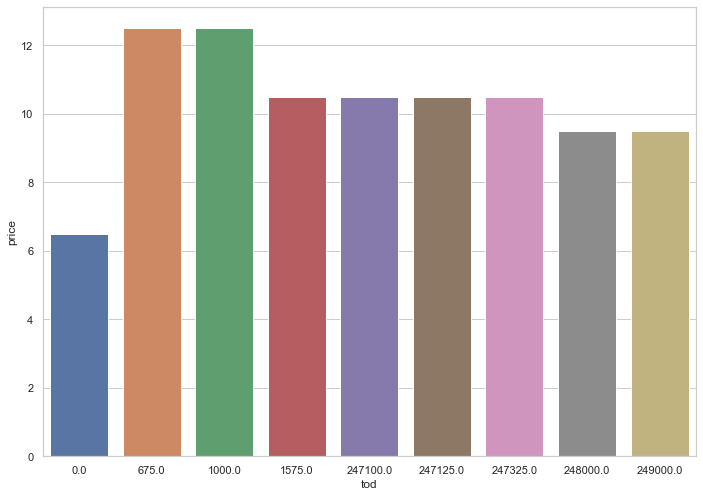

In [175]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")
sns.barplot(data=onlyTrades,x='tod',y='price',)

In [151]:
data = px.data.gapminder()

data_canada = data[data.country == 'Canada']
data_canada

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
240,Canada,Americas,1952,68.750,14785584,11367.16112,CAN,124
241,Canada,Americas,1957,69.960,17010154,12489.95006,CAN,124
242,Canada,Americas,1962,71.300,18985849,13462.48555,CAN,124
243,Canada,Americas,1967,72.130,20819767,16076.58803,CAN,124
244,Canada,Americas,1972,72.880,22284500,18970.57086,CAN,124
245,Canada,Americas,1977,74.210,23796400,22090.88306,CAN,124
246,Canada,Americas,1982,75.760,25201900,22898.79214,CAN,124
247,Canada,Americas,1987,76.860,26549700,26626.51503,CAN,124
248,Canada,Americas,1992,77.950,28523502,26342.88426,CAN,124
249,Canada,Americas,1997,78.610,30305843,28954.92589,CAN,124


In [157]:
!pip install seaborn